In [16]:
import pandas as pd
from tqdm import tqdm

In [3]:
data = pd.read_csv(r'C:\Users\songs\Desktop\Springboard Files\Springboard-Files\Take-home Challenges\relax_challenge\takehome_users.csv',encoding='latin-1')
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [9]:
da = pd.read_csv(r'C:\Users\songs\Desktop\Springboard Files\Springboard-Files\Take-home Challenges\relax_challenge\takehome_user_engagement.csv',encoding='latin-1')
da.info()
da['time_stamp'] = da['time_stamp'].astype('datetime64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [339]:
da['year'] = da.time_stamp.dt.year
da['week'] = da.time_stamp.dt.weekofyear
da['dayofweek'] = da.time_stamp.dt.dayofweek
da.head()

,time_stamp,user_id,visited,week,dayofweek,year
0,2014-04-22 03:53:30,1,1,17,1,2014
1,2013-11-15 03:45:04,2,1,46,4,2013
2,2013-11-29 03:45:04,2,1,48,4,2013
3,2013-12-09 03:45:04,2,1,50,0,2013
4,2013-12-25 03:45:04,2,1,52,2,2013


In [340]:
da_1 = da.groupby(['user_id','week','year'])['dayofweek'].nunique()

In [341]:
da_1

user_id  week  year
1        17    2014    1
2        1     2013    1
         2     2014    1
         6     2014    3
         7     2014    2
         10    2014    1
         11    2014    1
         14    2014    1
         46    2013    1
         48    2013    1
         50    2013    1
         52    2013    1
3        12    2013    1
4        21    2013    1
5        4     2013    1
6        51    2013    1
7        51    2012    1
10       1     2013    1
               2014    4
         2     2014    4
         3     2013    1
               2014    6
         4     2013    1
               2014    6
         5     2013    1
               2014    6
         6     2013    2
               2014    3
         7     2013    2
               2014    6
                      ..
11982    49    2013    1
11983    31    2013    1
11984    7     2014    1
11986    26    2012    1
11987    11    2013    1
11988    12    2014    4
         13    2014    2
         14    2014    3
     

In [342]:
dictionary = {}
for x in tqdm(da['user_id'].unique()):
    dictionary[x] = da_1.loc[x].max()

100%|████████████████████████████████████████████████████████████████████████████| 8823/8823 [00:03<00:00, 2688.11it/s]


In [343]:
da_2 = pd.DataFrame(dictionary,index=[0])
da_2 = da_2.transpose()
da_2.head()

,0
1,1
2,3
3,1
4,1
5,1


In [344]:
da_2['object_id'] = da_2.index
da_2['active'] = da_2[0] > 2
da_2 = da_2.drop(0,axis=1)
da_2.head(12)

,object_id,active
1,1,False
2,2,True
3,3,False
4,4,False
5,5,False
6,6,False
7,7,False
10,10,True
11,11,False
13,13,False


In [354]:
data.merge(da_2,on='object_id',how='inner')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_x,invited,active_y
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,True,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,True,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,True,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,True,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False,True,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False,False,False
7,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True,True,True
8,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN,False,False,False
9,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1.396196e+09,0,0,254,11204.0,False,True,False


In [352]:
data1a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 20 columns):
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            8823 non-null float64
active                        6457 non-null object
invited                       8823 non-null bool
year                          8823 non-null int64
month                         8823 non-null int64
day                           8823 non-null int64
hour                          8823 non-null int64
duration                      8823 non-null float64
GUEST_INVITE                  8823 non-null uint8
ORG_INVITE                    8823 non-null uint8
PERSONAL_PROJECTS             8823 non-null uint8
SIGNUP                        8823 non-null uint8
SIGNUP_GOOGLE_AUTH            8823 non-null uint8
email_domain                  8823 non-null object
domain_influence              8823 non

In [221]:
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,True


In [355]:
data1 = data.copy()
data1['invited'] = data1['invited_by_user_id'].notnull()
data1 = data1.drop(['object_id','name'],axis=1)
data1['creation_time'] = data1['creation_time'].astype('datetime64')
data1['creation_source'] = data1['creation_source'].astype('category')
data1.head()

,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited
0,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,True
1,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,True
2,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,True
3,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,True
4,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,True


In [356]:
data1a = data.copy()
data1a['invited'] = data1a['invited_by_user_id'].notnull()
data1a = data1a.drop(['object_id','name'],axis=1)
data1a['creation_time'] = data1a['creation_time'].astype('datetime64')
data1a['creation_source'] = data1a['creation_source'].astype('category')
data1a['year'] = data1a['creation_time'].dt.year
data1a['month'] = data1a['creation_time'].dt.month
data1a['day'] = data1a['creation_time'].dt.day
data1a['hour'] = data1a['creation_time'].dt.hour
data1a['duration'] = (data1a['last_session_creation_time']) - data1a.creation_time.values.astype(np.int64) // 10 ** 9

data1a = pd.concat([data1a,pd.get_dummies(data1a['creation_source'])],axis=1)
data1a = data1a.drop(['creation_source','creation_time','last_session_creation_time'],axis=1)
data1a.head()

,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited,year,month,day,hour,duration,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,AugustCClausen@yahoo.com,1,0,11,10803.0,False,True,2014,4,22,3,0.0,1,0,0,0,0
1,MatthewPoole@gustr.com,0,0,1,316.0,True,True,2013,11,15,3,11750400.0,0,1,0,0,0
2,MitchellBottrill@gustr.com,0,0,94,1525.0,False,True,2013,3,19,23,0.0,0,1,0,0,0
3,NicklasSClausen@yahoo.com,0,0,1,5151.0,False,True,2013,5,21,8,86400.0,1,0,0,0,0
4,GraceRaw@yahoo.com,0,0,193,5240.0,False,True,2013,1,17,10,432000.0,1,0,0,0,0


In [357]:
data1a['email_domain'] = data1a['email'].str.extract(pat='(@[a-z]*\.[a-z]*)')
data1a = data1a.drop('email',axis=1)
data1a.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited,year,month,day,hour,duration,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,email_domain
0,1,0,11,10803.0,False,True,2014,4,22,3,0.0,1,0,0,0,0,@yahoo.com
1,0,0,1,316.0,True,True,2013,11,15,3,11750400.0,0,1,0,0,0,@gustr.com
2,0,0,94,1525.0,False,True,2013,3,19,23,0.0,0,1,0,0,0,@gustr.com
3,0,0,1,5151.0,False,True,2013,5,21,8,86400.0,1,0,0,0,0,@yahoo.com
4,0,0,193,5240.0,False,True,2013,1,17,10,432000.0,1,0,0,0,0,@yahoo.com


In [358]:
org_influence = {}
invite_influence = {}
domain_influence = {}

for x in tqdm(data1a['org_id'].unique()):
    temp = data1a[data1a.org_id==x]
    org_influence[x] = temp['active'].sum()/temp.shape[0]

for x in tqdm(data1a['invited_by_user_id'].unique()):
    temp = data1a[data1a.invited_by_user_id==x]
    invite_influence[x] = temp['active'].sum()/temp.shape[0]
    
for x in tqdm(data1a['email_domain'].unique()):
    temp = data1a[data1a.email_domain==x]
    domain_influence[x] = temp['active'].sum()/temp.shape[0]

  0%|                                                                                         | 0/2230 [00:00<?, ?it/s]C:\Users\songs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()
100%|███████████████████████████████████████████████████████████████████████████████| 812/812 [00:01<00:00, 653.41it/s]


In [359]:
org_influence = pd.DataFrame(org_influence,index=[0]).transpose()
org_influence['org_id'] = org_influence.index
org_influence.head()

,0,org_id
11,0.125000,11
1,0.081395,1
94,0.260870,94
193,0.272727,193
197,0.181818,197


In [360]:
invite_influence = pd.DataFrame(invite_influence,index=[0]).transpose()
invite_influence['invited_by_user_id'] = invite_influence.index
invite_influence.head()

,0,invited_by_user_id
10803.0,0.0,10803.0
316.0,0.5,316.0
1525.0,0.0,1525.0
5151.0,0.2,5151.0
5240.0,0.0,5240.0


In [361]:
domain_influence = pd.DataFrame(domain_influence,index=[0]).transpose()
domain_influence['email_domain'] = domain_influence.index
domain_influence.head()

,0,email_domain
@yahoo.com,0.135574,@yahoo.com
@gustr.com,0.154394,@gustr.com
@jourrapide.com,0.171008,@jourrapide.com
@cuvox.de,0.147343,@cuvox.de
@gmail.com,0.163481,@gmail.com


In [333]:
domain_influence.sort_values(0)

,0,email_domain
@anogl.com,0.0,@anogl.com
@yoydr.com,0.0,@yoydr.com
@lyjyt.com,0.0,@lyjyt.com
@huekm.com,0.0,@huekm.com
@bttmc.com,0.0,@bttmc.com
@vxdvx.com,0.0,@vxdvx.com
@syrnm.com,0.0,@syrnm.com
@pobmi.com,0.0,@pobmi.com
@ruxgl.com,0.0,@ruxgl.com
@mndbu.com,0.0,@mndbu.com


In [362]:
data1a = data1a.merge(org_influence,on='org_id',how='outer')
data1a = data1a.merge(invite_influence,on='invited_by_user_id',how='outer')
data1a = data1a.merge(domain_influence,on='email_domain',how='outer')
data1a.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited,year,month,day,hour,duration,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,email_domain,0_x,0_y,0
0,1,0,11,10803.0,False,True,2014,4,22,3,0.0,1,0,0,0,0,@yahoo.com,0.125000,0.0,0.135574
1,0,0,11,NaN,False,False,2013,4,12,11,0.0,0,0,0,1,0,@yahoo.com,0.125000,NaN,0.135574
2,0,0,1,NaN,True,False,2014,3,19,20,6566400.0,0,0,0,1,0,@yahoo.com,0.081395,NaN,0.135574
3,0,0,1,NaN,False,False,2014,5,26,6,0.0,0,0,1,0,0,@yahoo.com,0.081395,NaN,0.135574
4,1,0,1,NaN,False,False,2012,9,24,5,0.0,0,0,0,1,0,@yahoo.com,0.081395,NaN,0.135574


In [363]:
data1a['domain_influence'] = data1a[0]
data1a['invite_influence'] = data1a.iloc[:,-3]
data1a['org_influence'] = data1a.iloc[:,-5]
data1a.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited,year,month,day,hour,...,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,email_domain,0_x,0_y,0,domain_influence,invite_influence,org_influence
0,1,0,11,10803.0,False,True,2014,4,22,3,...,0,0,0,@yahoo.com,0.125000,0.0,0.135574,0.135574,0.0,0.125000
1,0,0,11,NaN,False,False,2013,4,12,11,...,0,1,0,@yahoo.com,0.125000,NaN,0.135574,0.135574,NaN,0.125000
2,0,0,1,NaN,True,False,2014,3,19,20,...,0,1,0,@yahoo.com,0.081395,NaN,0.135574,0.135574,NaN,0.081395
3,0,0,1,NaN,False,False,2014,5,26,6,...,1,0,0,@yahoo.com,0.081395,NaN,0.135574,0.135574,NaN,0.081395
4,1,0,1,NaN,False,False,2012,9,24,5,...,0,1,0,@yahoo.com,0.081395,NaN,0.135574,0.135574,NaN,0.081395


In [364]:
data1a = data1a.drop(['0_x','0_y',0],axis=1)
data1a.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited,year,month,day,hour,duration,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,email_domain,domain_influence,invite_influence,org_influence
0,1,0,11,10803.0,False,True,2014,4,22,3,0.0,1,0,0,0,0,@yahoo.com,0.135574,0.0,0.125000
1,0,0,11,NaN,False,False,2013,4,12,11,0.0,0,0,0,1,0,@yahoo.com,0.135574,NaN,0.125000
2,0,0,1,NaN,True,False,2014,3,19,20,6566400.0,0,0,0,1,0,@yahoo.com,0.135574,NaN,0.081395
3,0,0,1,NaN,False,False,2014,5,26,6,0.0,0,0,1,0,0,@yahoo.com,0.135574,NaN,0.081395
4,1,0,1,NaN,False,False,2012,9,24,5,0.0,0,0,0,1,0,@yahoo.com,0.135574,NaN,0.081395


In [365]:
data1a = data1a.drop('invited_by_user_id',axis=1)
data1a = data1a.fillna(0)
data1a.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active,invited,year,month,day,hour,duration,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,email_domain,domain_influence,invite_influence,org_influence
0,1,0,11,False,True,2014,4,22,3,0.0,1,0,0,0,0,@yahoo.com,0.135574,0.0,0.125000
1,0,0,11,False,False,2013,4,12,11,0.0,0,0,0,1,0,@yahoo.com,0.135574,0.0,0.125000
2,0,0,1,True,False,2014,3,19,20,6566400.0,0,0,0,1,0,@yahoo.com,0.135574,0.0,0.081395
3,0,0,1,False,False,2014,5,26,6,0.0,0,0,1,0,0,@yahoo.com,0.135574,0.0,0.081395
4,1,0,1,False,False,2012,9,24,5,0.0,0,0,0,1,0,@yahoo.com,0.135574,0.0,0.081395


In [222]:
print(data1.creation_time.min())
print(data1.creation_time.max())

2012-05-31 00:43:27
2014-05-30 23:59:19


In [80]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 9 columns):
creation_time                 8823 non-null datetime64[ns]
email                         8823 non-null object
creation_source               8823 non-null category
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            4776 non-null float64
active                        8823 non-null bool
invited                       8823 non-null bool
dtypes: bool(2), category(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 508.6+ KB


In [81]:
data1['year'] = data1['creation_time'].dt.year
data1['month'] = data1['creation_time'].dt.month
data1['day'] = data1['creation_time'].dt.day
data1['hour'] = data1['creation_time'].dt.hour
data1.head()

,creation_time,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited,year,month,day,hour
0,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,False,True,2014,4,22,3
1,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,True,True,2013,11,15,3
2,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,False,True,2013,3,19,23
3,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,False,True,2013,5,21,8
4,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,False,True,2013,1,17,10


In [83]:
data1 = data1.drop('creation_time',axis=1)

In [84]:
data1.year.unique()

array([2014, 2013, 2012], dtype=int64)

In [103]:
data2 = pd.concat([data1,pd.get_dummies(data1['creation_source'])],axis=1)
data2 = data2.drop(['creation_source','invited_by_user_id'],axis=1)
data2.head()

,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active,invited,year,month,day,hour,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,AugustCClausen@yahoo.com,1,0,11,False,True,2014,4,22,3,1,0,0,0,0
1,MatthewPoole@gustr.com,0,0,1,True,True,2013,11,15,3,0,1,0,0,0
2,MitchellBottrill@gustr.com,0,0,94,False,True,2013,3,19,23,0,1,0,0,0
3,NicklasSClausen@yahoo.com,0,0,1,False,True,2013,5,21,8,1,0,0,0,0
4,GraceRaw@yahoo.com,0,0,193,False,True,2013,1,17,10,1,0,0,0,0


In [109]:
data3 = data3.drop('invited_by_user_id',axis=1)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 1 to 8812
Data columns (total 15 columns):
email                         1445 non-null object
opted_in_to_mailing_list      1445 non-null int64
enabled_for_marketing_drip    1445 non-null int64
org_id                        1445 non-null int64
active                        1445 non-null bool
invited                       1445 non-null bool
year                          1445 non-null int64
month                         1445 non-null int64
day                           1445 non-null int64
hour                          1445 non-null int64
GUEST_INVITE                  1445 non-null uint8
ORG_INVITE                    1445 non-null uint8
PERSONAL_PROJECTS             1445 non-null uint8
SIGNUP                        1445 non-null uint8
SIGNUP_GOOGLE_AUTH            1445 non-null uint8
dtypes: bool(2), int64(7), object(1), uint8(5)
memory usage: 111.5+ KB


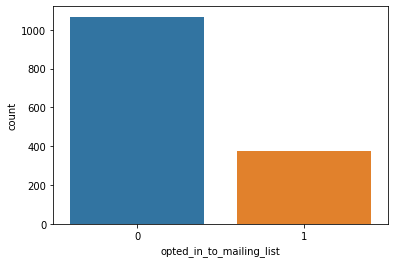

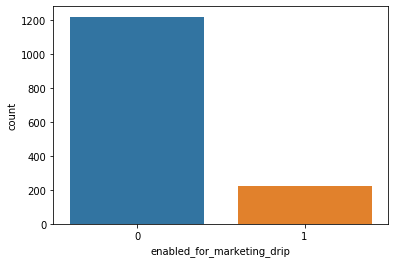

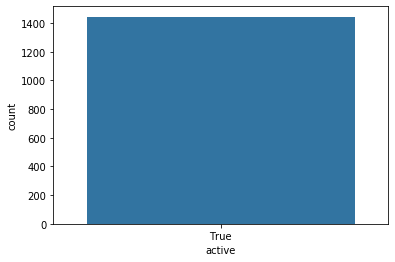

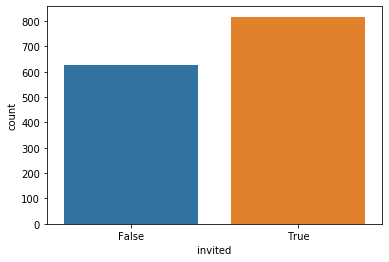

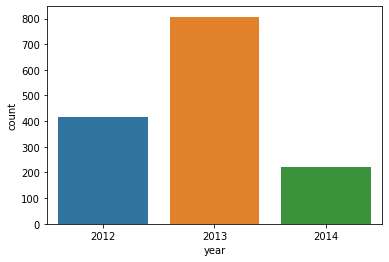

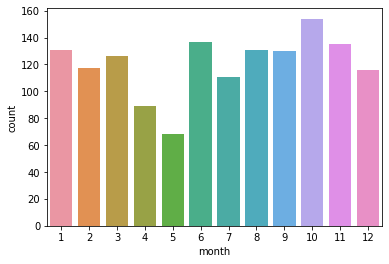

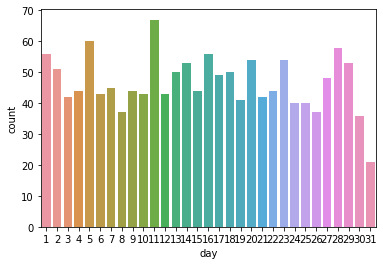

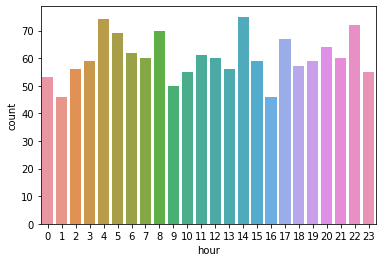

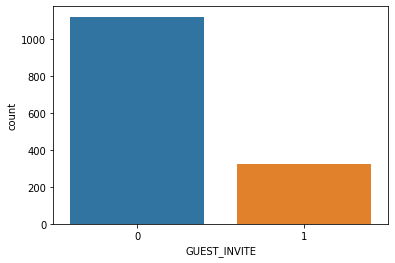

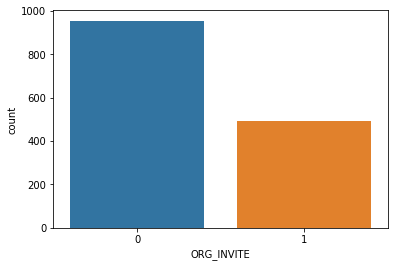

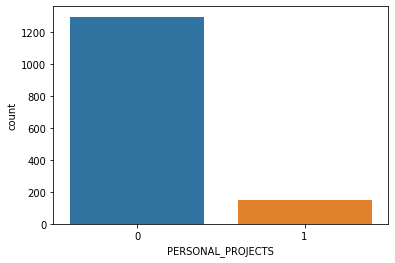

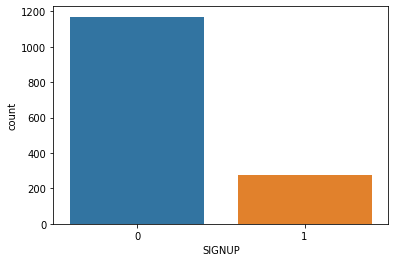

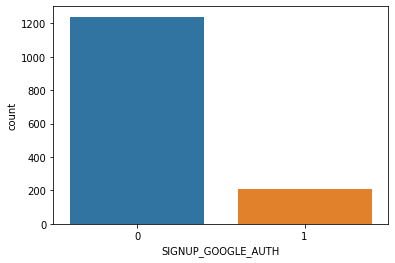

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
for x in data3.columns:
    if x != 'email' and x!= 'org_id':
        sns.countplot(x, data=data3)
        plt.show()

In [118]:
data2 = data2.drop('email',axis=1)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

In [380]:
params = {'max_depth':[20,50,80,None]}
reg = RandomForestClassifier(n_estimators=150)
reg_cv = GridSearchCV(reg, param_grid=params, scoring='f1',cv=5, verbose=10)
reg_cv.fit(X_train, y_train)
print(reg_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=20 ....................................................
[CV] ........................ max_depth=20, score=0.988, total=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] max_depth=20 ....................................................
[CV] ........................ max_depth=20, score=0.985, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] max_depth=20 ....................................................
[CV] ........................ max_depth=20, score=0.973, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] max_depth=20 ....................................................
[CV] ........................ max_depth=20, score=0.990, total=   0.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV] max_depth=20 ....................................................
[CV] ........................ max_depth=20, score=0.985, total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s


[CV] max_depth=50 ....................................................
[CV] ........................ max_depth=50, score=0.988, total=   0.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s remaining:    0.0s


[CV] max_depth=50 ....................................................
[CV] ........................ max_depth=50, score=0.985, total=   0.2s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.2s remaining:    0.0s


[CV] max_depth=50 ....................................................
[CV] ........................ max_depth=50, score=0.978, total=   0.2s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.4s remaining:    0.0s


[CV] max_depth=50 ....................................................
[CV] ........................ max_depth=50, score=0.990, total=   0.2s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.5s remaining:    0.0s


[CV] max_depth=50 ....................................................
[CV] ........................ max_depth=50, score=0.988, total=   0.2s
[CV] max_depth=80 ....................................................
[CV] ........................ max_depth=80, score=0.988, total=   0.2s
[CV] max_depth=80 ....................................................
[CV] ........................ max_depth=80, score=0.988, total=   0.2s
[CV] max_depth=80 ....................................................
[CV] ........................ max_depth=80, score=0.978, total=   0.2s
[CV] max_depth=80 ....................................................
[CV] ........................ max_depth=80, score=0.993, total=   0.2s
[CV] max_depth=80 ....................................................
[CV] ........................ max_depth=80, score=0.988, total=   0.2s
[CV] max_depth=None ..................................................
[CV] ...................... max_depth=None, score=0.985, total=   0.2s
[CV] m

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


{'max_depth': 80}


In [377]:
y = data5a['active']
X = data5a.drop(['active'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
f1_score(y_test,y_pred)

0.9907407407407408

In [337]:
confusion_matrix(y_test,y_pred)

array([[2193,   20],
       [  47,  387]], dtype=int64)

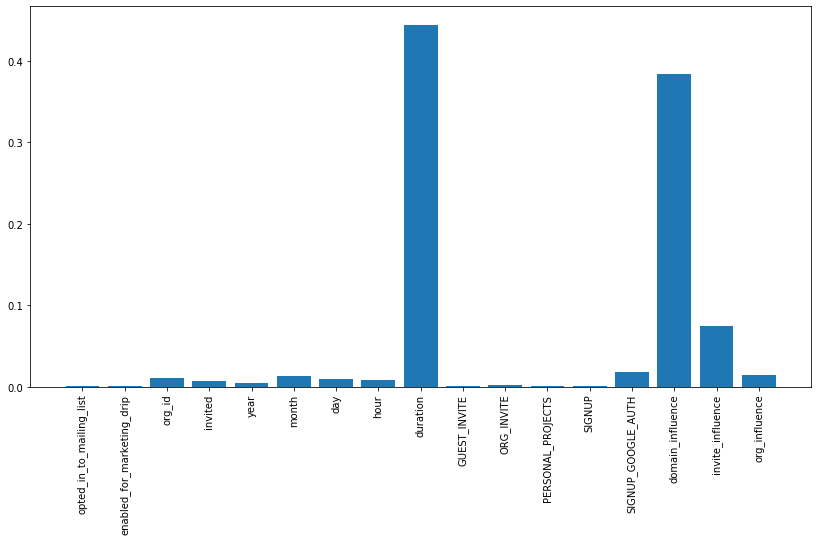

In [370]:
plt.figure(figsize=(14,7))
plt.bar(range(len(rfc.feature_importances_)),rfc.feature_importances_)
plt.xticks(range(len(rfc.feature_importances_)),data5a.drop(['active'],axis=1).columns,rotation=90)
plt.show()

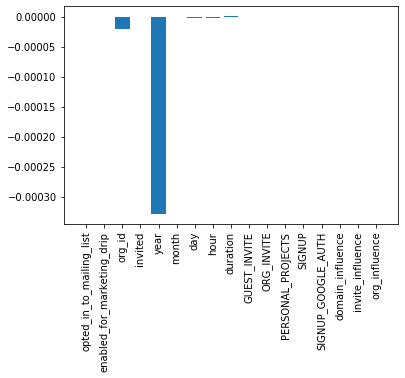

In [372]:
something = pd.Series(np.reshape(log.coef_,-1))
plt.bar(range(len(something)),something)
plt.xticks(range(len(something)),data5a.drop(['active'],axis=1).columns,rotation=90)
plt.show()

In [371]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
f1_score(y_test,y_pred)

C:\Users\songs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9524886877828054

In [124]:
from sklearn.metrics import confusion_matrix

In [198]:
data4 = data2[data2.active==False].iloc[]
data5 = pd.concat([data3,data4],axis=0).drop('email',axis=1)

C:\Users\songs\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [199]:
data5.head()

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,active,day,enabled_for_marketing_drip,hour,invited,month,opted_in_to_mailing_list,org_id,year
1,0,1,0,0,0,True,15,0,3,True,11,0,1,2013
7,0,1,0,0,0,True,16,1,22,True,1,1,318,2013
13,0,0,0,1,0,True,6,0,11,False,3,0,58,2014
24,1,0,0,0,0,True,11,0,6,True,3,0,401,2014
28,0,0,0,1,0,True,11,0,19,False,11,1,235,2012


In [366]:
data4a = data1a[data1a.active==False].iloc[0:1445]
data3a = data1a[data1a.active==True]
data5a = pd.concat([data3a,data4a],axis=0).drop('email_domain',axis=1)

In [319]:
data5a.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited,year,month,day,hour,duration,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,domain_influence,invite_influence,org_influence
2,0,0,1,0.0,True,False,2014,3,19,20,6566400.0,0,0,0,1,0,0.135574,0.0,0.081395
6,0,0,1,0.0,True,False,2012,8,20,7,55555200.0,0,0,1,0,0,0.135574,0.0,0.081395
50,1,0,58,0.0,True,False,2012,10,5,5,52444800.0,0,0,1,0,0,0.135574,0.0,0.236842
66,1,1,134,0.0,True,False,2013,5,22,0,32659200.0,0,0,0,1,0,0.135574,0.0,0.181818
80,1,1,63,0.0,True,False,2014,1,23,8,11145600.0,0,0,0,1,0,0.135574,0.0,0.266667


In [323]:
data6a = pd.concat([data6a,data3a],axis=0)
data6a.shape

(7225, 20)

In [324]:
data7a = pd.concat([data6a,data1a[data1a.active==False]]).drop('email_domain',axis=1)